특정상황에 가장 적합한 모델 찾아야 한다.

가장 적합함 = 모델의 오류(error)를 최소화 또는 우도(likelihood)를 최대화.

최적화 문제를 풀기위해서 경사하강법(gradient descent)라 부르는 방법이 사용.

8.1 경사하강법에 숨은 의미

실수 벡터를 입력시 실수 하나 출력 함수 f

In [1]:
from collections import Counter
from functools import reduce
import math, random

import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def sum_of_squares(v):
    # v에 속해 있는 항목들의 제곱합을 계산.
    return sum(v_i ** 2 for v_i in v)

In [3]:
data = [i for i in range(10)]
sum_of_squares(data)

285

위와 같은 류의 함수를 종종 최대화(or 최소화) 해야 함.

gredient(경사, 기울기 or 편미분벡터(미적분))는 함수가 가장 빠르게 증가할 수 있는 방향을 나타냄.

따라서 함수의 최대값을 구하는 방법 중 하나는 임의의 시작점을 잡고, graident를 계산 후, gradient의 방향으로 이동하는 과정을 반복하는 것.

8.2 Gradient 계산

f가 단변수 함수인 경우, 점x에서의 미분값은 x가 아주 조금 변했을 때의 f(x)의 변화량.

h : x의 변화량 (아주 조금 변한 다는 것을 반영키위해 h를 0에 점근)

미분값은 함수 변화율(difference quotient)의 극한값이다.

In [4]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

In [5]:
def square(x): # square함수
    return x * x
def derivative(x): # square의 도함수
    return 2 * x

# 도함수를 구할 수 없다면, 아주 작은 e 값을 대입해 미분값을 어림 잡을 수 있음
derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)

No handles with labels found to put in legend.


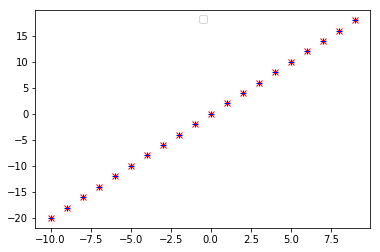

In [6]:
# 두 계산식에 따른 결과값이 거의 비슷함을 보여 주기 위한 그래프
x = range(-10,10)

plt.plot(x, list(map(derivative, x)), 'rx')           # 빨강 x
plt.plot(x, list(map(derivative_estimate, x)), 'b+')  # 파랑 +
plt.legend(loc=9)
plt.show()                                            # 보라 *

In [7]:
# 만약 f가 다변수 함수라면 여러 개의 입력 변수 중 하나에 작은 변화가 있을 때, f(x)의
# 변화량을 알려주는 편도함수(partial derivative)
# i번ㅉㅐ 편도함수는, i번째 변수를 제외한 다른 모든 입력변수를 고정시켜서 계산 가능
def partial_difference_quotient(f, v, i, h):
    # 함수 f의 i번째 편도함수가 v에서 가지는 값
    w = [v_j + (h if j == i else 0) # h를 v의 i번째 변수에만 더해주자
         for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

In [8]:
# 일반적인 도함수와 같은 방법으로 gradient의 근사값을 구할 수 있다.
def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

8.3 Gradient 적용하기

함수 sum_of_squares는 v가 0벡터일 때 가장 작은 값을 가짐.

만약 이 사실을 모른다고 가정하고, 경사하강법을 이용하여 3차원 벡터의 최소값을 구한다면,

임의의 시작점을 잡고, gradient가 아주 작아질 때까지 경사의 반대 방향으로 조금씩 이동하면 된다.

In [9]:
# 두 벡터간의 거리 구하는 공식
# math.sqrt((math.pow(v1)-(math.pow(w1)))+...+(math.pow(vn)-(math.pow(wn))))
def sqared_distance(v,w):
    # (v_1 - w_1)**2 + ... + (v_n - w_n)**2
    return sum_of_squares(vector_subtract(v,w))

def distance(v,w):
    return math.sqrt(sqared_distance(v,w))

def vector_subtract(v,w):
    return [v_i-w_i for v_i, w_i in zip(v,w)]

In [10]:
def step(v, direction, step_size):
    # v에서 step_size만큼 이동
    return [v_i + step_size * direction_i
           for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2* v_i for v_i in v]

# 임의의 시작점 선택
v = [random.randint(-10,10) for i in range(3)]
print(v)

tolerance = 0.0000001

while True:
    gradient = sum_of_squares_gradient(v) # v의 경사도 계산
    next_v = step(v, gradient, -0.01)     # 경사도의 음수만큼 이동
    if distance(next_v, v) < tolerance:   # tolerance 만큼 수렴하게 되면 멈춘다.
        break
    v = next_v                            # 아니면 반복
    
print("using gradient")    
print(v) # v값이 [0,0,0]에 아주 가깝게 수렴; tolerance를 작게 하면 할수록 더 가까이 수렴.
print(sum_of_squares(v)) 

[-7, 7, -1]
using gradient
[-3.5109155820194306e-06, 3.5109155820194306e-06, -5.015593688599185e-07]
2.4904618248624836e-11


8.4 적절한 이동 거리 정하기

경사를 따라 이동하다는 논리는 명백하나, 이동 거리(step size), 즉 얼마만큼 이동해야 하는지 정하는 것은 다름.

실제로 이동 거리를 정하는 것은 과학보단 기술(art)에 가깝다.
    - 이동 거리 고정
    - 시간에 따라 이동거리를 점차 줄임
    - 이동할 때마다 목적 함수를 최소화하는 이동 거리로 정함

세번째 방법이 가장 좋아보이나, 이는 계산비용이 너무 크다. 대신 몇몇 정해진 이동 거리를 시도하고 그 중에서 목적 함수를 가장 최소화하는 값을 고르는 방법이 있다.

In [11]:
step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

그러나 이 중 몇몇은 f에 부적합한 값을 넣어 오류를 발생시킬 수 있음. 따라서 safe라는 함수를 만들어 f에 오류가 발생했을 때 무한대(infinity) 반환.

In [12]:
def safe(f):
    # f와 똑같은 함수를 반환하지만 f에 오류가 발생시, 무한대 반환
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

8.5 종합

대부분의 경우 최소화하려는 함수 target_fn과 그에 대한 gradient함수 gradient_fn이 존재.

e.g. taget_fn이 특정 모델의 파라미터(parameter)에 대한 오류값 함수라고 가정.

경사 하강법을 이용하면 오류값을 최소화하는 파라미터를 찾을 수 있다.

더불어 파라미터 theta_0의 시작점을 (어떻게든) 구했다고 해보자. 그러면 경사하강법을 구할 수 있다.

In [13]:
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    # 목적 함수를 최소화시키는 theta를 경사 하강법을 사용해서 찾아준다.
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

    theta = theta_0                           # theta를 시작점으로 설정
    target_fn = safe(target_fn)               # 오류를 처리할 수 있는 target_fn으로 반환
    value = target_fn(theta)                  # 최소화 시키려는 값

    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes]

        # 함수를 최소화시키는 theta를 선택
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)

        # tolerance만큼 수렴하면 멈춤
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

위 함수를 minimize_batch라고 하는 이유는, 반복문을 돌 때마다 데이터셋 전체를 살피기 때문.

(즉, target_fn이 데이터셋 전체에 대한 에러를 반환)

반대로 한번에 하나의 데이터 포인트를 보내는 방법도 있음.

함수를 최대화해야 할 때, 목적 함수의 음수값을 최소화하면 된다. (결국, gradient도 음수값)

In [14]:
def negate(f):
    # x 입력시 -f(x)를 반환해주는 함수 생성
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    # f가 여러 숫자를 반환할 때 모든 숫자를 음수로 변환
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
                          negate_all(gradient_fn),
                          theta_0,
                          tolerance)

In [16]:
print("using minimize_batch")
v = [random.randint(-10,10) for i in range(3)]
print (v)
v = minimize_batch(sum_of_squares, sum_of_squares_gradient, v)

print("minimum v", v)
print("minimum value", sum_of_squares(v))

using minimize_batch
[-1, -4, 9]
minimum v [-0.00016615349947311455, -0.0006646139978924582, 0.0014953814952580302]
minimum value 2.705484567941901e-06


8.6 SGD (stochastic gradient descent)

위와 같이 경사하강법을 이용하여 모델 오류를 최소화하는 파라미터를 자주 찾게 되는데, 

minimize_batch를 이용하면 반복문을 돌 때마다 데이터 전체에 대해 gradient값을 계산해야해서 계산시간이 오래 걸린다.

대부분의 오류 함수는 더할 수 있는(additive)속성을 가짐.

이말인 즉슨, "데이터 전체에 대한 오류값이 각각 데이터 포인트에 대한 오류값의 합과 같다."

->반복문들 돌 때마다 데이터 포인트 한 개에 대한 gradient를 계산하는 SGD를 사용 가능.

SGD는 수렴할 떄까지 전체 데이터셋을 반복적으로 사용.

In [ ]:
def in_random_order(data):
    # 임의 순서로 data의 데이터 포인트 반환
    indexes = [i for i, _ in enumerate(data)]  # 데이터 포인트의 인덱스를 list로 생성
    random.shuffle(indexes)                    # 인덱스 섞기
    for i in indexes:                          # 섞인 순서대로 데이터 반환
        yield data[i]

이후에 각 데이터 포인트에 대해 gradient 계산하면 됨.

그러나 이렇게 되면 최적해 근방에 영원히 떠돌게 될 수 있으므로 함수값이 한동안 줄지 않는다면,

이동거리를 줄이도록 해야 함.

In [ ]:
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):

    data = list(zip(x, y))
    theta = theta_0                             # 첫 시작점
    alpha = alpha_0                             # 기본 이동 거리
    min_theta, min_value = None, float("inf")   # 시작할 때의 최소값
    iterations_with_no_improvement = 0

    # 만약 100번 넘게 반복하는 동안 더 작아지지 않는다면 멈춤
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )

        if value < min_value:
            # 새로운 최소값을 찾았다면 이 값 저장
            # 기본 이동 거리로 다시 돌아감
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # 만약 최소값이 줄어들지 않는다면(최적해 근방에 떠돌 가능성) 이동거리 축소
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # 각 데이터 포인트에 대해 경사 계산
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))

    return min_theta

일반적으로 minimize_stochastic은 minimize_batch 보다 훨씬 빠름.

아래는 최대화 버전.

In [18]:
def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
                               negate_all(gradient_fn),
                               x, y, theta_0, alpha_0)

여기부터는 책 내용이 아닌 https://github.com/newhiwoong/DATA_SCIENCE_FROM_SCRATCH 에서 발췌한, Test를 위한 예제.

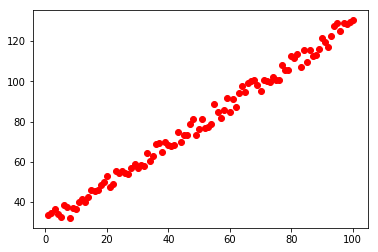

In [19]:
# Numpy version from : http://stackoverflow.com/questions/17784587/gradient-descent-using-python-and-numpy

def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i+bias) + random.uniform(0, 1) * variance
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 10)

plt.plot(x[:,1]+1,y,"ro")
plt.show()

In [20]:

# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    theta_list = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
        if i % 2500 == 0:
            theta_list.append(theta)
    return theta,np.array(theta_list)

m, n = np.shape(x)
numIterations= 50000
alpha = 0.0005
x.transpose()
theta = np.ones(n)
theta,theta_list = gradientDescent(x, y, theta, alpha, m, numIterations)

theta

array([30.18804485,  0.99659249])

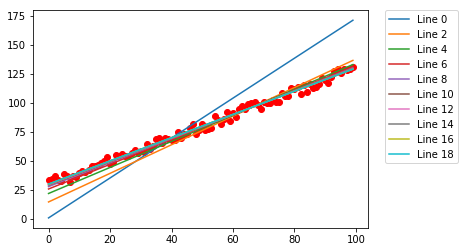

In [21]:
y_predict_step= np.dot(x, theta_list.transpose())
plt.plot(x[:,1],y,"ro")
for i in range (0,20,2):
    plt.plot(x[:,1],y_predict_step[:,i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

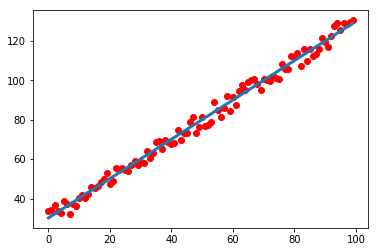

In [22]:
y_predict= np.dot(x, theta)

plt.plot(x[:,1],y,"ro")
plt.plot(x[:,1],y_predict, lw=3)

Reference :

밑바닥부터 시작하는 데이터과학 8장,

https://github.com/newhiwoong/DATA_SCIENCE_FROM_SCRATCH